In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt, seaborn as sns
from tqdm import tqdm
import random
tqdm.pandas()

In [2]:
df = pd.read_csv('data/transactions_final.csv')

In [3]:
df['MCC'].unique()

array([3730., 5411., 5942., 5300., 5912., 5311., 4814., 7538., 5932.,
       3389., 5814., 5921., 5812., 4214., 5499., 3684., 5541., 4784.,
       4900., 5813., 4121., 3359., 4829., 5211., 5251., 5310., 7801.,
       5815., 7230., 3504., 8011., 7210., 5651., 5045., 5970., 6300.,
       7832., 3771., 8043., 5719., 3509., 7995., 5533., 5621., 3390.,
       4722., 8111., 3066., 8049., 3596., 3009., 4111., 8021., 9402.,
       7011., 5094., 7349., 5261., 3640., 3780., 5947., 4899., 7542.,
       7802., 8099., 5977., 8062., 3775., 3405., 5712., 7922., 5732.,
       3722., 7996., 3006., 1711., 3393., 5193., 5655., 3075., 7393.,
       5192., 5661., 3387., 3174., 5816., 4511., 8041., 7276., 3144.,
       3001., 8931., 4131., 3395., 3008., 7531., 3000., 4112., 3005.,
       3260., 5733., 3132., 3256., 5941., 3058., 3007., 7549.])

In [72]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22530 entries, 0 to 22529
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Amount                22530 non-null  float64
 1   Use Chip              22530 non-null  float64
 2   MCC                   22530 non-null  float64
 3   Has Chip              22530 non-null  float64
 4   Merchant Latitude     22530 non-null  float64
 5   Merchant Longitude    22530 non-null  float64
 6   Month                 22530 non-null  float64
 7   Day of Week           22530 non-null  float64
 8   Day                   22530 non-null  float64
 9   Hour                  22530 non-null  float64
 10  Distance to Merchant  22530 non-null  float64
 11  Latitude              22530 non-null  float64
 12  Longitude             22530 non-null  float64
 13  Age                   22530 non-null  float64
 14  Is Fraud              22530 non-null  float64
dtypes: float64(15)
memo

## Prediction

In [73]:
X = df.drop('Is Fraud',axis=1)
X = X.apply(pd.to_numeric, errors='coerce')

scaler = StandardScaler()
X_s = scaler.fit_transform(X)
X_s = pd.DataFrame(X, columns=X.columns)

y = df['Is Fraud']

X_train, X_test, y_train, y_test = train_test_split(X_s, y, stratify=y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((15770, 14), (6760, 14))

In [74]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=20, class_weight='balanced', n_estimators=100, oob_score=True)
rf.fit(X_train, y_train)

rf.oob_score_

0.99714648065948

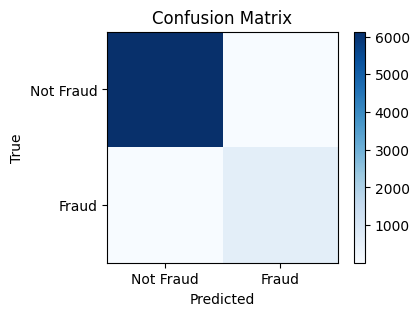

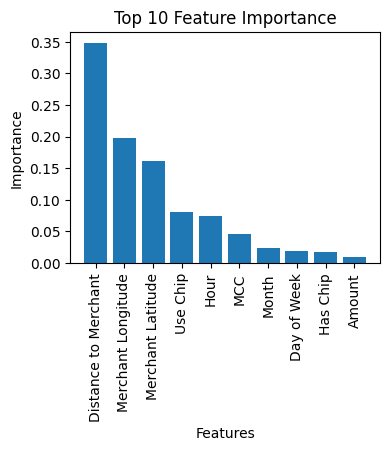

F1 Score: 0.9863672814755413
[[6128   12]
 [   5  615]]


In [75]:
# Predict on test data
y_pred = rf.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.yticks([0, 1], ['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot feature importance
# Plot top 10 feature importances
# Get feature importances and sort them in descending order
importances = rf.feature_importances_
sorted_idx = importances.argsort()[::-1]

plt.figure(figsize=(4, 3))
plt.bar(range(10), importances[sorted_idx[:10]])
plt.xticks(range(10), X_train.columns[sorted_idx[:10]], rotation='vertical')
plt.title('Top 10 Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Print F1 score
print('F1 Score:', f1)
print(cm)

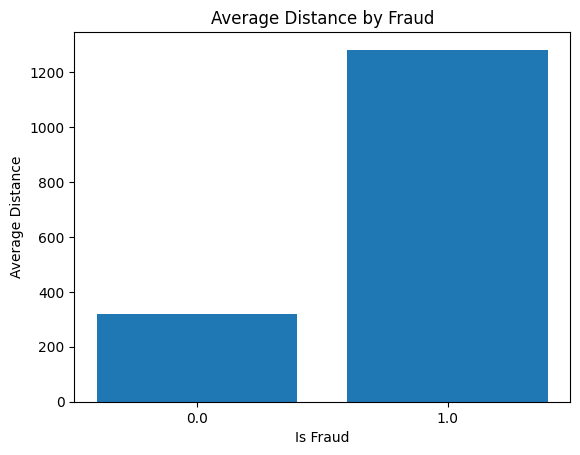

In [77]:
# Calculate average distance for each target value
grouped = df.groupby('Is Fraud')['Distance to Merchant'].mean()

# Plot bar chart
fig, ax = plt.subplots()
ax.bar(grouped.index.astype(str), grouped.values)
ax.set_xlabel('Is Fraud')
ax.set_ylabel('Average Distance')
ax.set_title('Average Distance by Fraud')
plt.show()

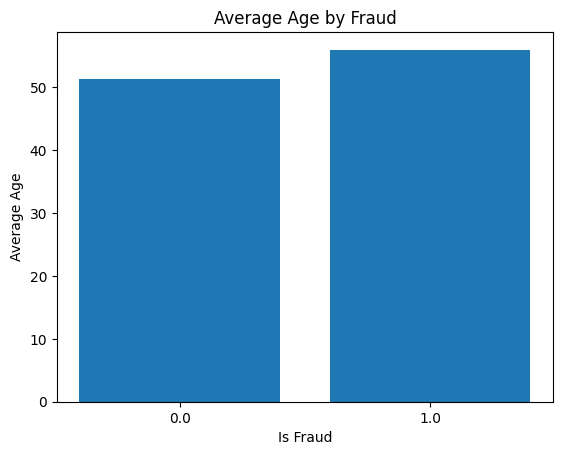

In [78]:
# Calculate average distance for each target value
grouped = df.groupby('Is Fraud')['Age'].mean()

# Plot bar chart
fig, ax = plt.subplots()
ax.bar(grouped.index.astype(str), grouped.values)
ax.set_xlabel('Is Fraud')
ax.set_ylabel('Average Age')
ax.set_title('Average Age by Fraud')
plt.show()

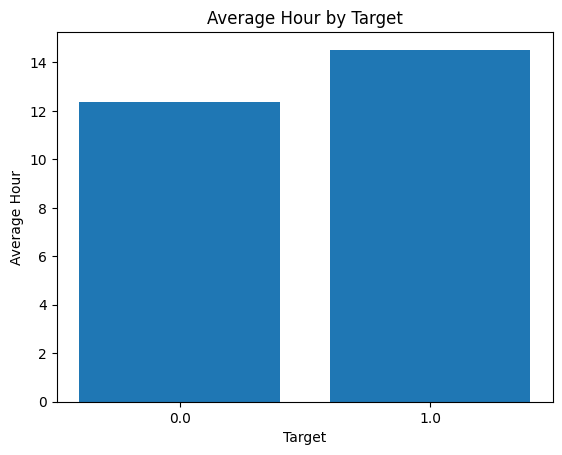

In [79]:
# Calculate average distance for each target value
grouped = df.groupby('Is Fraud')['Hour'].mean()

# Plot bar chart
fig, ax = plt.subplots()
ax.bar(grouped.index.astype(str), grouped.values)
ax.set_xlabel('Target')
ax.set_ylabel('Average Hour')
ax.set_title('Average Hour by Target')
plt.show()

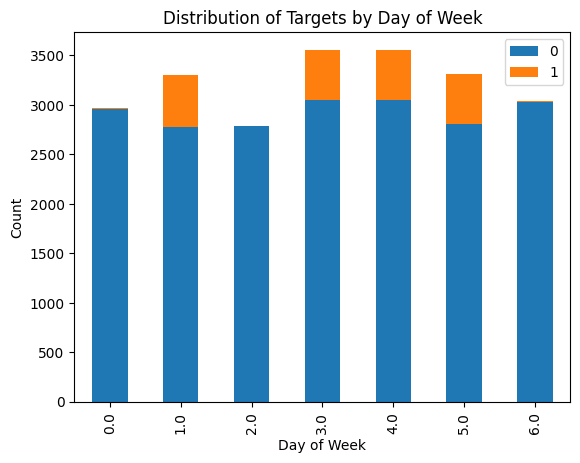

In [80]:
# Group by day of week and binary target variable
grouped = df.groupby(['Day of Week', 'Is Fraud']).size().unstack()

# Create bar chart
grouped.plot(kind='bar', stacked=True)

# Add legend and axis labels
plt.legend(['0', '1'])
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Distribution of Targets by Day of Week')

# Display the chart
plt.show()

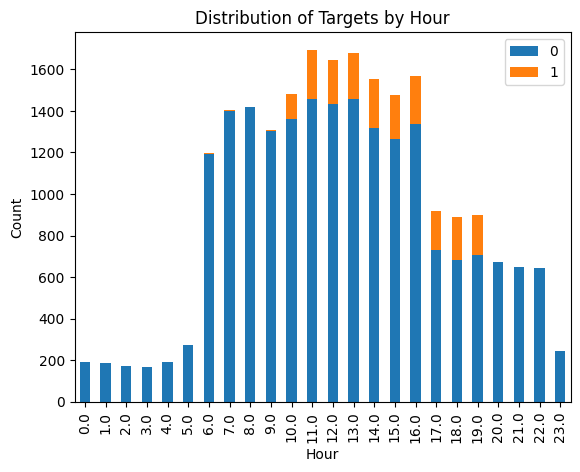

In [81]:
# Group by day of week and binary target variable
grouped = df.groupby(['Hour', 'Is Fraud']).size().unstack()

# Create bar chart
grouped.plot(kind='bar', stacked=True)

# Add legend and axis labels
plt.legend(['0', '1'])
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Distribution of Targets by Hour')

# Display the chart
plt.show()

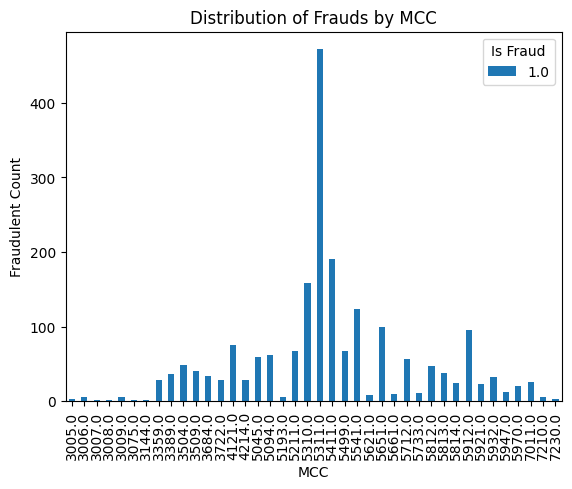

In [ ]:
# Group by day of week and binary target variable
grouped = df[df['Is Fraud'] > 0.].groupby(['MCC', 'Is Fraud']).size().unstack()

# Create bar chart
grouped.plot(kind='bar', stacked=True)

# Add legend and axis labels
plt.xlabel('MCC')
plt.ylabel('Fraudulent Count')
plt.title('Distribution of Frauds by MCC')

# Display the chart
plt.show()

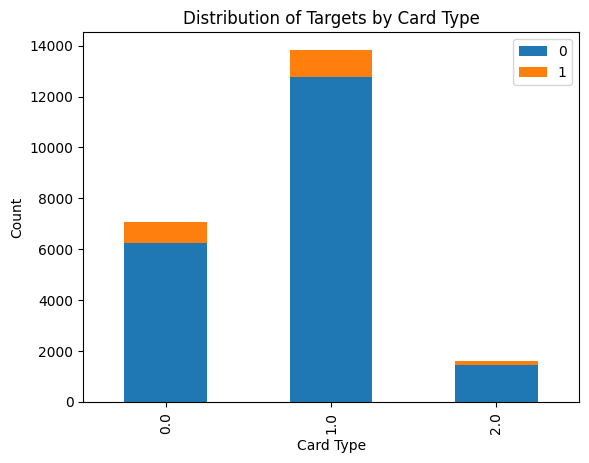

In [ ]:
# Group by day of week and binary target variable
grouped = df.groupby(['Card Type', 'Is Fraud']).size().unstack()

# Create bar chart
grouped.plot(kind='bar', stacked=True)

# Add legend and axis labels
plt.legend(['0', '1'])
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.title('Distribution of Targets by Card Type')

# Display the chart
plt.show()